In [1]:
import matplotlib.pyplot as plt
import mpl_lego as mplego
import numpy as np
import pandas as pd

from hate_target import keys

%matplotlib inline

In [2]:
mplego.style.use_latex_style()

In [3]:
data_path = "~/data/hatespeech/unfiltered_ratings.feather"

In [4]:
data = pd.read_feather(data_path)

In [5]:
avg = data[['comment_id'] + keys.target_groups].groupby('comment_id').agg('mean')

In [15]:
is_target = avg >= 0.5

In [22]:
is_target.sum()

target_race          8551
target_religion      4784
target_origin        4688
target_gender        9558
target_sexuality     5268
target_age            339
target_disability     502
target_politics      2502
dtype: int64

In [6]:
targets = {}

for key in keys.target_groups:
    group = avg[key]
    agreement = group >= 0.5
    comment_ids = avg[agreement].index.values
    targets[key] = comment_ids

In [11]:
n_groups = len(keys.target_groups)

In [7]:
counts = [len(val) for val in targets.values()]

[Text(0, 0, 'Race'),
 Text(1, 0, 'Religion'),
 Text(2, 0, 'Origin'),
 Text(3, 0, 'Gender'),
 Text(4, 0, 'Sexuality'),
 Text(5, 0, 'Age'),
 Text(6, 0, 'Disability'),
 Text(7, 0, 'Politics')]

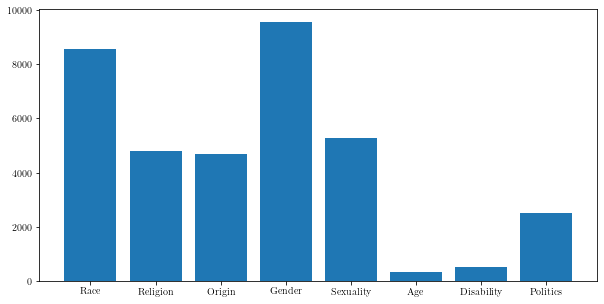

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.bar(np.arange(n_groups), counts)
ax.set_xticks(np.arange(n_groups))
ax.set_xticklabels(keys.target_labels)

(array([  24.,  594., 6538.,  420., 1173., 2716.,  936.,  249., 2815.,
          74., 1762.]),
 array([0.00541516, 0.09583197, 0.18624877, 0.27666557, 0.36708238,
        0.45749918, 0.54791598, 0.63833279, 0.72874959, 0.81916639,
        0.9095832 , 1.        ]),
 <BarContainer object of 11 artists>)

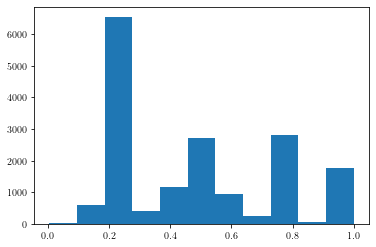

In [17]:
plt.hist(avg[avg['target_race'] != 0]['target_race'], bins=11)

,target_race,target_religion,target_origin,target_gender,target_sexuality,target_age,target_disability,target_politics
comment_id,,,,,,,,
1,0.80,0.0,0.00,0.00,0.00,0.0,0.0,0.00
2,0.00,0.0,0.20,0.00,0.80,0.2,0.2,0.00
3,0.75,0.0,0.00,0.00,0.00,0.0,0.0,0.00
4,0.00,0.0,0.00,0.00,0.75,0.0,0.0,0.25
5,0.60,0.0,0.00,0.00,0.60,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...
50066,0.25,0.0,0.75,0.00,0.00,0.0,0.0,0.00
50067,0.00,0.0,0.25,0.00,0.00,0.0,0.0,0.00
50068,0.00,0.0,0.50,0.50,0.00,0.0,0.0,0.00


In [7]:
[col for col in data.columns if ('target_' in col) and col.count('_') == 1]

['target_race',
 'target_religion',
 'target_origin',
 'target_gender',
 'target_sexuality',
 'target_age',
 'target_disability',
 'target_politics']